### Objective is to predict the probability of default or risky customers.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Importing the Data for ML Project

In [2]:
df_loan = pd.read_csv('loan.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


- Data belongs to company called 'Lending Club' (LC), a Non-Banking Financial Company (NBFC) in US.

# Setting Display options to ensure feature name visibility

In [3]:
pd.set_option('display.max_columns',None)
# Display option set so that max. columns are displayed, and the columns don't get truncated

# Warning Suppression

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_loan.shape

(887379, 74)

In [6]:
df_loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_loan['title'].head()

0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object

- This feature doesn't tell anything about the person's ability to pay back the loan. Loan can't be given based on the 'title' of the individual.
So, this variable needs to be dropped.

# Drop ID Feature from the dataset

In [8]:
df_loan=df_loan.drop(['id','member_id','url','title', 'zip_code', 'addr_state'],axis=1)

#### Compulsory drop of ID type of Features
- ID type features simply act as row identifiers when data get built into the database
- ID can falsely become the best predictor when it ideally should not be a driving factor for the outcome
- url needs to be dropped, as url can't help decide whether the customer is going to be risky or not.
- Loan can't be given based on the 'title' of the individual. So, this variable needs to be dropped. This variable gives no idea or clue about the person's ability to pay back the loan.
- 'zip_code' , 'addr_state' need to be dropped, as living in a certain state doesn't make someone a better customer. 
- Since 'emp_title' doesn't talk about the payment capacity, it should be dropped.

In [9]:
#pd.set_option('max_columns',None)
#df_loan.head()

In [10]:
df_loan.dtypes # gives visibility into different data-types

loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
term                 object
int_rate            float64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 68, dtype: object

- desc: Description of loan
- dti: debt to income, i.e. how much income vs how much debt
- dti_joint: debt to joint income, where joint income is family's combined income
- earliest_cr_line: Since how long has the credit been taken for the first time              
- emp_length: length of employment
- inq_last_6mths: tells us how many times a person has inquired about a loan. High number of this variable, i.e. higher number of inquiries, is 'Risky'
- revol_bal: The Balance which is not yet paid by the customer is called Revolving Balance.

In [11]:
# Creating a Frequency Table in Pandas for each categorical
# dataframe['categorical feature'].value_counts()  --- value_counts() function will show you which all values the categorical 
# feature will take and also how many observations are there for each of them

In [12]:
#Analyzing loan_status variable for getting a better understanding of the categories and the counts
df_loan['loan_status'].value_counts() 

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

- Target variable not defined in this dataset, as its Unsupervised dataset.
- Various status of the loan given.
- 'Fully Paid' corresponds to those who have fully paid whatever they have spent.
- 'Charged Off' customers are those who haven't made any payment, even 120 days & beyond. These are gone away customers. Its like after default.
- Default customers haven't paid in the last 90 days.
- Anybody who is 90-120 days late in payment, is already getting captured in 'Default'.
- Being 'Late' & 'Default' may overlap, but being late in payment does not necessarily mean 'Default'. Its not an issue when the customer continues to make payments, when he is 'Late'. It could be that the customer is paying something called the minimum balance every month, and still continues to be late. Its not a big concern.Not every Late payer is a defaulter.
What is even more problematic is categories like 'Charged Off', which corresponds to hopeless, gone away customers. 
- The worst possible risk scenarios are chosen to create a target variable.
- Categorization of loan_status variable is the most important part, as it gives the 'target' variable.
- Taking variables 'Default', 'Charged Off' & 'Does not meet the credit policy. Status:Charged Off' for dependent variable 'target', we can say that this model predicts the likelihood of Charged Off.


# Define the Dependent Variable 

In [13]:
# Composite Risk target value created
df_loan['target']=np.where(df_loan['loan_status'].isin(['Default','Charged Off','Does not meet the credit policy. Status:Charged Off']),1,0)


- Taking variables 'Default', 'Charged Off' & 'Does not meet the credit policy. Status:Charged Off' for target variable, we can say that this model predicts the likelihood of Charged Off.

In [14]:
# Drop the loan_status variable
df_loan=df_loan.drop(['loan_status'],axis=1)

- Since, the 'target' variable has been derived on the 'loan_status' variable itself, 'loan_status' variable is dropped.

# Calculate the default rate or event rate in the data

In [15]:
df_loan['target'].mean()

0.053221904056778443

- Very unbalanced data, but very good from Risk modelling perspective, because it has atleast 5% events, i.e. 5% of the whole data.
- Normally, over-sampling is only done in Risk modelling only when the Default rate is less than 1%, to make sure that the default rate reaches atleast 5-6%, which is a good enough default rate for building model.
- Since, 'target' variable is made out of 'Default','Charged Off' & 'Does not meet the credit policy. Status:Charged Off'. Calling it a 'Risky' variable (Event of either 'Default' or 'Charged Off') would be appropriate.
- Default is not very common. Majority people will pay back the loan.

In [16]:
df_loan.shape

(887379, 68)

# Missing Value Analysis

In [17]:
df_loan.isnull().mean()

loan_amnt           0.000000
funded_amnt         0.000000
funded_amnt_inv     0.000000
term                0.000000
int_rate            0.000000
                      ...   
total_rev_hi_lim    0.079195
inq_fi              0.975916
total_cu_tl         0.975916
inq_last_12m        0.975916
target              0.000000
Length: 68, dtype: float64

- Gives the percentage of missing values for all the features.
- Columns 'emp_length', 'mths_since_last_delinq', 'mths_since_last_record' etc. have missing values present. 
- 'mths_since_last_delinq' has more than 50% missing rows.

In [18]:
#data['open_acc_6m_Rank']=pd.qcut(data['open_acc_6m'].rank(method='first').values,10,duplicates='drop').codes+1

In [19]:
# Selecting all rows and only those columns where the missing value percentage is <=25%
data=df_loan.loc[:,df_loan.isnull().mean()<=0.25]

- Going with the cleanest possible data, and try and see if a good model can be created.

In [20]:
data.shape

(887379, 46)

- 22 Features dropped Due to more than 25% Missing Values

# Seperating dependent & independent features

In [21]:
# Creating a dataset with only dependent and independent
Y=data[['target']]
X=data.drop(['target'],axis=1)

In [22]:
X.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
out_prncp   

- Both Object as well as numerical features present. Mix of datatypes in X.

# Split features into Numerical and Categorical

In [23]:
char=X.select_dtypes(include='object')
num=X.select_dtypes(include='number')

- Whenever the feature has datatype as number, it goes to 'num' dataframe. 
- Whenever the feature has datatype as object, it goes to 'char' dataframe.
- select_dtypes function seperates the categorical & numerical columns.

In [24]:
# We have 15 Categorical features
char.shape

(887379, 15)

In [25]:
# We have 30 numeric features
num.shape

(887379, 30)

In [26]:
num.isnull().mean()

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
int_rate                      0.000000
installment                   0.000000
annual_inc                    0.000005
dti                           0.000000
delinq_2yrs                   0.000033
inq_last_6mths                0.000033
open_acc                      0.000033
pub_rec                       0.000033
revol_bal                     0.000000
revol_util                    0.000566
total_acc                     0.000033
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
collections_12_mths_ex_med    0.000163
policy_code              

- All missing values are less than 25% now.

# Capping and Flooring of outliers

In [27]:
# function to clip the values at 2 percentile points
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

- For every variable, its value wouldn't go below its first percentile value
- Clip function looks for the threshold. Lower threshold of the first quantile, and the upper threshold of 99%ile.
- It will take into account all the percentile points, and then clip & floor at 1%ile and 99%ile points.
- Maximum standard deviation/Variance to be retained for every feature. Because if standard deviation goes down, the predictive power of the model goes down. This is the reason why 1% and 99% are taken, and not 25% & 75%.

In [28]:
num=num.apply(lambda x : outlier_cap(x)) # applying this function as lambda across all the columns

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

- SimpleImputer class imported from impute module of sklearn library.
- Object 'imputer' created with parameters - strategy='mean' & missing_values=np.nan.missing_values=np.nan will set a definition for missing values; missing values defined as 'not a number' kind of entry from numpy. Wherever it sees np.nan kind of input in the data, it will think of it as a missing values. 
- Average of the populated values is used to impute the numerical columns

In [30]:
num_1.isnull().mean()

loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
int_rate                      0.0
installment                   0.0
annual_inc                    0.0
dti                           0.0
delinq_2yrs                   0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_pymnt                   0.0
total_pymnt_inv               0.0
total_rec_prncp               0.0
total_rec_int                 0.0
total_rec_late_fee            0.0
recoveries                    0.0
collection_recovery_fee       0.0
last_pymnt_amnt               0.0
collections_12_mths_ex_med    0.0
policy_code                   0.0
acc_now_delinq                0.0
tot_coll_amt                  0.0
tot_cur_bal                   0.0
total_rev_hi_l

- Post imputation, there are no missing values in 'num_1' dataframe.

# Replace the missing values in Categorical using the Mode or the Most Frequent Strategy
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
char_1=pd.DataFrame(imputer.fit_transform(char),index=char.index,columns=char.columns)

In [31]:
char_1=char.fillna(0) # choosing to replace the missing values with 0

In [32]:
char_1.isnull().mean()

term                   0.0
grade                  0.0
sub_grade              0.0
emp_title              0.0
emp_length             0.0
home_ownership         0.0
verification_status    0.0
issue_d                0.0
pymnt_plan             0.0
purpose                0.0
earliest_cr_line       0.0
initial_list_status    0.0
last_pymnt_d           0.0
last_credit_pull_d     0.0
application_type       0.0
dtype: float64

In [33]:
# To avoid discrimation an enable fair lending, we are not using any title variables are risk identifier factors
char_1=char_1.drop(['issue_d','sub_grade','last_credit_pull_d','earliest_cr_line','last_pymnt_d'],axis=1)

- bunch of other variables are being dropped
- 'earliest_cr_line' denotes how long the person has credit limit. Since, the data is quite old and non-dynamic; static data is extracted from the database; one-time data extracted from database, taking any decision about the 'target' variable based on the dates per se, wouldn't be wise. This is the reason why 'earliest_cr_line' is dropped. 

#### 10 Categorical Features droppping based on Fair Lending Considerations

In [34]:
# Joining back the target  variable and exporting the pivot table for a BiVariate Analysis
#categorical_variable_chk=pd.concat([Y,char_1],axis=1,join='inner')
#categorical_variable_chk.to_csv('C:/Users/aksin52/Documents/My Webinars/Credit Risk Datasets and Projects/Lending Data and Project/lending-club-loan-data/categorical_data_chk.csv')

In [35]:
num_1['loan_amnt'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    887379.000000
mean      14759.987672
std        8428.021535
min        1800.000000
10%        5000.000000
20%        7175.000000
30%        9600.000000
40%       11000.000000
50%       13000.000000
60%       15000.000000
70%       18450.000000
80%       21600.000000
90%       28000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

- People getting the loan amount of upto 5000, goes to lowest rank-0. People getting the loan amount between 5000-7175, assigned rank-1.
- People with loan amount 28000 or more, goes into Rank-9.

In [36]:
from sklearn.preprocessing import KBinsDiscretizer   # Class 'KBinsDiscretizer' is imported from sklearn library
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile') # Object 'discrete' with these parameters
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank') # method 'fir_transform' is applied over original data-frames
# Output of fit_transform gives n-dimensional array, which is converted into pandas dataframe. Suffix '_Rank' applied to all columns.
num_binned.head()

,loan_amnt_Rank,funded_amnt_Rank,funded_amnt_inv_Rank,int_rate_Rank,installment_Rank,annual_inc_Rank,dti_Rank,delinq_2yrs_Rank,inq_last_6mths_Rank,open_acc_Rank,pub_rec_Rank,revol_bal_Rank,revol_util_Rank,total_acc_Rank,out_prncp_Rank,out_prncp_inv_Rank,total_pymnt_Rank,total_pymnt_inv_Rank,total_rec_prncp_Rank,total_rec_int_Rank,total_rec_late_fee_Rank,recoveries_Rank,collection_recovery_fee_Rank,last_pymnt_amnt_Rank,collections_12_mths_ex_med_Rank,policy_code_Rank,acc_now_delinq_Rank,tot_coll_amt_Rank,tot_cur_bal_Rank,total_rev_hi_lim_Rank
0,1.0,1.0,0.0,2.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,5.0,8.0,0.0,0.0,0.0,5.0,5.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.0,6.0
1,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,6.0
2,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,6.0,6.0
3,3.0,3.0,3.0,5.0,4.0,2.0,6.0,0.0,1.0,4.0,0.0,2.0,0.0,8.0,0.0,0.0,7.0,7.0,8.0,7.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,6.0,6.0
4,0.0,0.0,0.0,4.0,0.0,6.0,5.0,0.0,0.0,8.0,0.0,8.0,4.0,8.0,0.0,0.0,3.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,6.0


- Bivariate Analysis is a great way to look at the predictive power of the feature, and also visualise the predictive power of the feature
- Bivariate analysis will be done for both numerical and categorical data. But for numerical, because the features are in the continuous form, these need to be converted to a discrete form. So, every feature will be converted into a ranked form from 0-9 (0 indicates the lowest of values, and 9 indicates the highest of the values)
- Deciles will be created, and based on the 10 percentile points, deciles are created. Then, ranks assigned to these deciles in order.
- Since, we are iterating over so many columns, it calls for looping, but it wouldn't be feasible for large number of features.
- Class 'KBinsDiscretizer', with encode='ordinal', strategy='quantile' makes the task of assigning ranks to groups, very easy.
- In case of 'quantile' strategy, the volume of data will be same across all the deciles, but the class-intervals won't be same.
- loan_amnt_Rank=0 means that is the lowest 10% of the loan amount.
- loan_amnt_Rank=9 indicates the highest 10% of the loan amount values.
- data-frame 'num_binned' gets created with ranked form of every single feature.
- The reason why this snippet is being run, is to access the impact of the ranks of features, on the event rate.

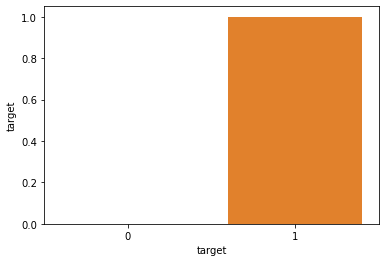

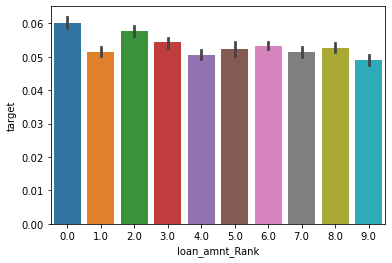

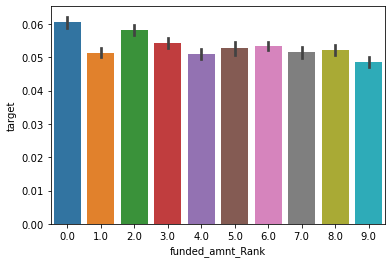

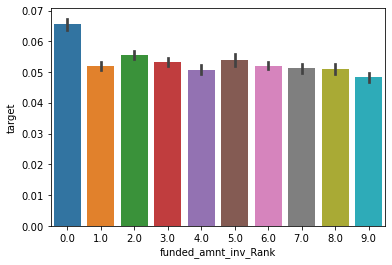

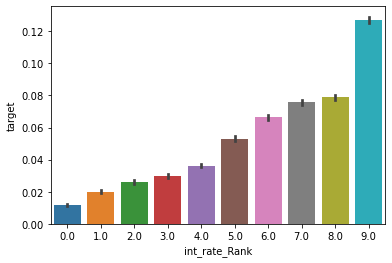

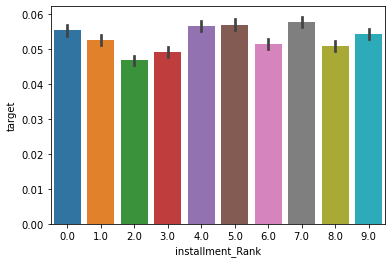

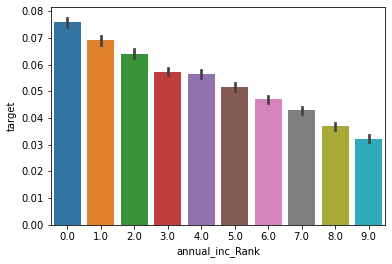

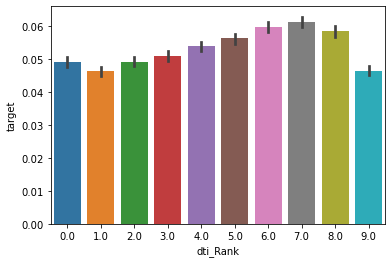

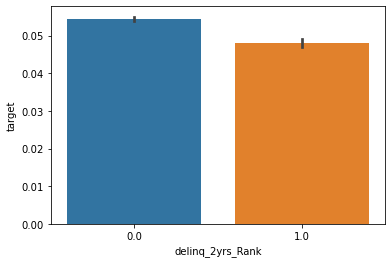

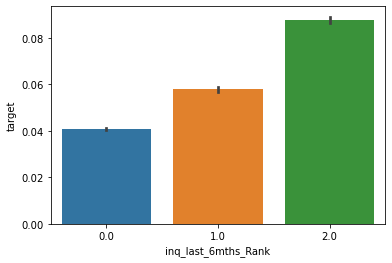

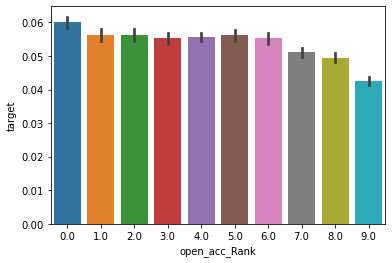

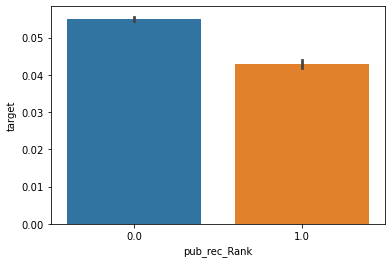

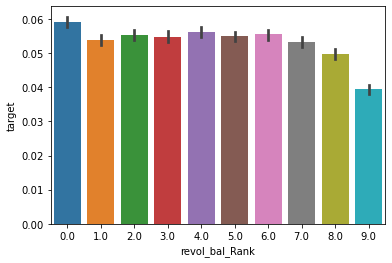

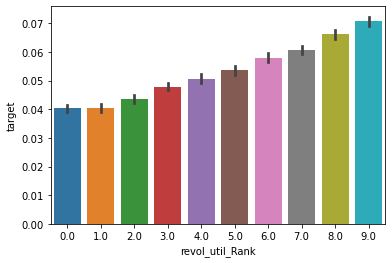

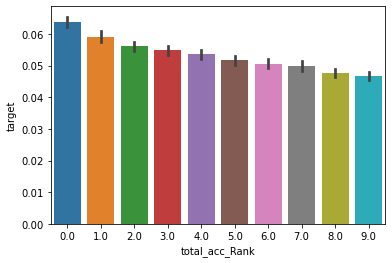

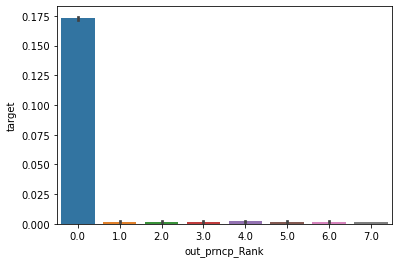

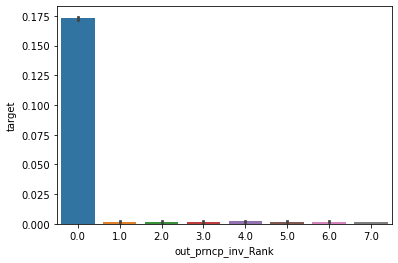

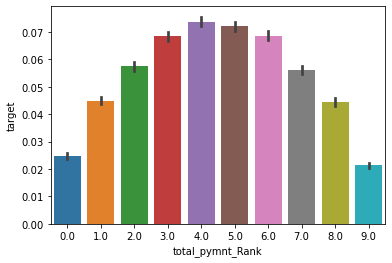

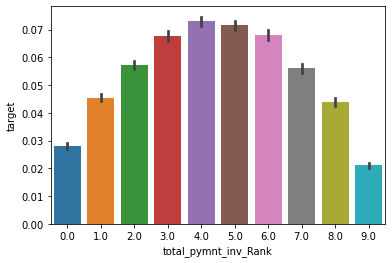

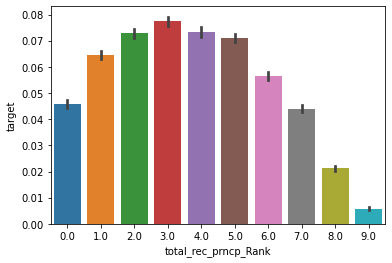

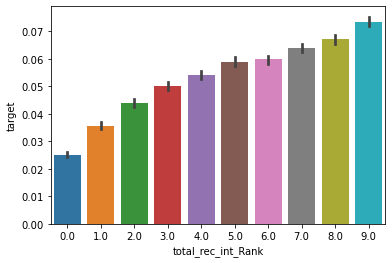

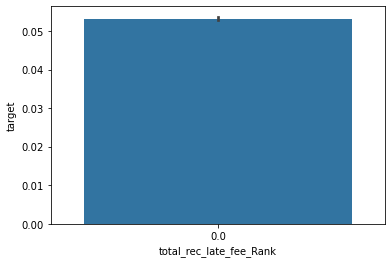

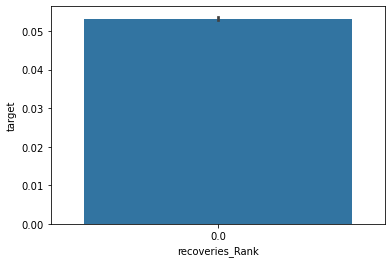

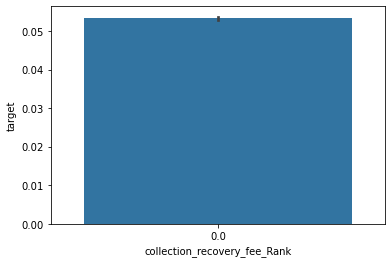

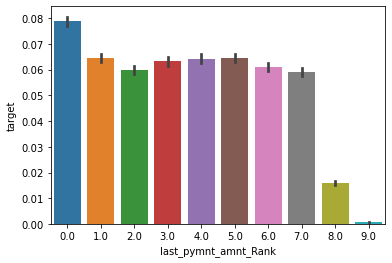

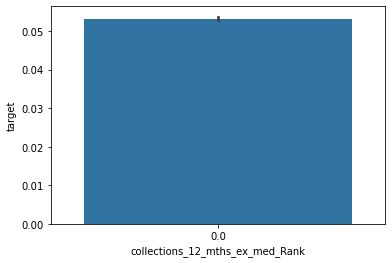

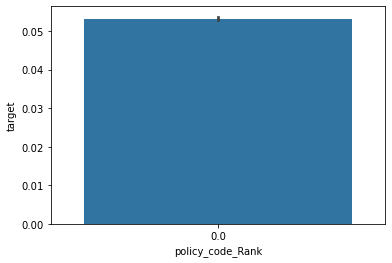

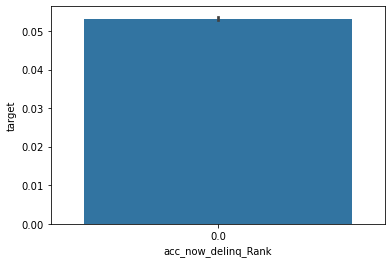

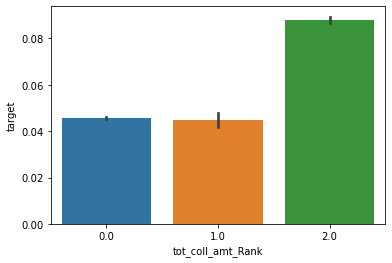

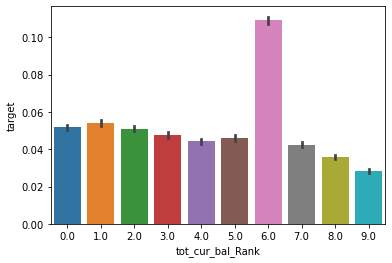

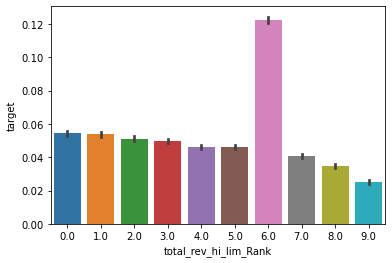

In [78]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner') # concatenating 'target' dataframe with 'binned' dataframe

import matplotlib.pyplot as plt
import seaborn as sns

from numpy import mean                         
for col in (X_bin_combined.columns):                                   # iterate over each column
    plt.figure()                                                       # With each iteration, a new chart gets created
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )# seaborn barplot used for plotting the graph.
                                                                       # estimator=mean indicates that average value of Y is being plotted
plt.show()

- Bivariate correlation or relationship
- The first graph is target vs target one, can be ignored.
- With ref. to target-loan_amnt_Rank, it doesn't really have an impact on the Risk per se. Flat graph.
- funded_amnt_Rank, funded_amnt_inv_Rank are also not good variables.
- int_rate_Rank, annual_inc_Rank are good predictors. There is a positive slope or upwards trend. Risky customer have a high interest rate. 
- Vaues taken by delinq_2yrs_Rank are not diverse enough, as most of the data in this case are seggregated into 2 ranks only. Its a case of tide ranks. But despite this, inferences can be drawn from this graph because encoding has been done in an ordinal way.
- encode='ordnal' means that as we move from 0 to 1, the value will increase. So, it can be inferred that there is an impact of an increasing delinq_2yrs_Rank on target variable. As the values of this feature increases, the risk goes down to some extent. But its not a good feature. There is not a lot of slope. So, this feature can be dropped.
- inq_last_6mths_Rank is a wonderful feature that can predict target variable.



In [37]:
# Select K Best for Numerical Features
from sklearn.feature_selection import SelectKBest, chi2              # importing SelectKBest class from feature selection module
selector = SelectKBest(chi2, k=15)                                   # for getting top 15 best predictors, and bring in an element of Chi Square test
X_new = selector.fit_transform(num_1, Y)                             # Object is Selector
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)                            # Takes all those columns that are getting selected by this method, and those indices are kept in list 'cols'
select_features_df_num = num_1.iloc[:,cols]                          # Apply iloc to slice data, by selecting list of cols that have passed SelectKBest test

- Feature selection process that takes statistical significance into account.
- Using Chi-square goodness of fit test, and selecting k=15 best features.

In [38]:
select_features_df_num.columns # to display columns which are statistically significant

Index(['funded_amnt_inv', 'annual_inc', 'revol_bal', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [39]:
select_features_df_num.dtypes       # final set of selected features

funded_amnt_inv            float64
annual_inc                 float64
revol_bal                  float64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_amnt            float64
tot_coll_amt               float64
tot_cur_bal                float64
total_rev_hi_lim           float64
dtype: object

- these features can be cross-checked from the graph. These have a slope present in their Bi-variate graphs.

KeyboardInterrupt: 

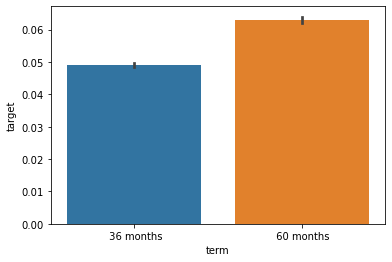

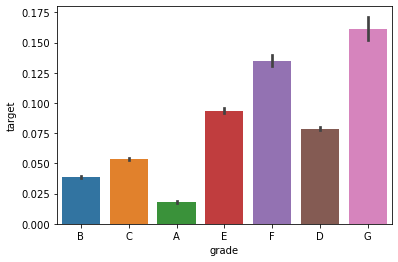

<Figure size 432x288 with 0 Axes>

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char_1],axis=1,join='inner') # concatenating dependent & character variables dataframes

from numpy import mean
for col in (char_1.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )  # plotting barplots using seaborn
plt.show()
# Running this snippet creates a few charts for each & every categorical variable

- Plot of Average value of dependent variable vs categorical variable
- With ref. to target-grade plot. Since the default rate was 5%. It can be seen that some grades are below 5%. All grades A,B & C are low risk ones (less than 5%). Grades D-G have default rate of much higher percentage, i.e. greater than 5%.
- Variable 'grade' discriminates between lower event rate and higher event rate. So, this is a good predictor.
- With ref. to target-term plot, variable 'term' doesn't seem to be a very good predictor, as category-60 months is not significantly higher than category-36 months. There is not much difference between these levels.
We need to find the features which are causing a difference in the risks.
- With ref. to target-emp_length plot. Again not very useful, as it doesn't make a lot of difference to risk.
- With ref. to target-purpose plot. This feature can be used in the feature engineering step below.
- This way this way of plotting target variable vs feature helps to visually identify the features causing discrimination between people who are at high risk & low risk.
- No need to discretize these categorical variables. No need for creating ranks in case of categorical variables.
- Looking at target-grade graph, it can be said that Machine Learning model would be a better choice than Logistic Regression model for this kind of graph. There is a lot of movement & non-linearity in this data.
- Looking at target-purpose plot, there are some levels, where the Risk is quite high, but is low mostly. Value count check on 'purpose' feature can be done, and then decide to group all these levels into the others category. 
- purpose, verified, home_ownership & term are 4 variables that are getting selected, but these are treated in a different way.

In [40]:
# Steps to regroup categorical features in order to achieve linear discrimination
# These levels to group have been discovered through the pivot analysis
char_1['purpose_1']=np.where(char_1['purpose'].isin(['other','medical','vacation','debt_consolidation','car','major_purchase','home_improvement','credit_card']),'others',char['purpose'])   # If purpose is in these categories, then assign 'others', else 'purpose'. 
char_1['verified_1']=np.where(char_1['verification_status'].isin(['Source Verified','Verified']),'Verified',char_1['verification_status'])
char_1['home_own_1']=np.where(char_1['home_ownership'].isin(['OWN','MORTGAGE']),'OWN',
                     np.where(char_1['home_ownership'].isin(['RENT']),'RENT','OTHER'))
char_1['term_1']=np.where(char_1['term'].isin(['60 months']),'60','30')

- Creating some derived features from original features.  
- Some specific levels of the original variable 'purpose' have been identified. These are being grouped. 
- Creating purpose_1 as an indicator variable holding only values 'others' & 'purpose'.        

In [41]:
char_2=char_1.loc[:,['purpose_1','verified_1','home_own_1','term_1','grade','emp_length','pymnt_plan','application_type']]

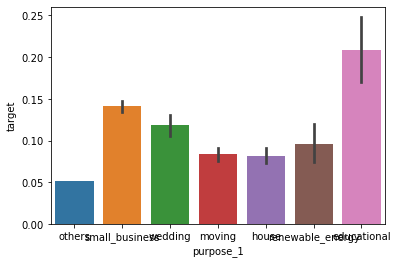

In [44]:
check=pd.concat([Y,char_2],axis=1,join="inner")
ax=sns.barplot(x="purpose_1", y="target",data=check, estimator=mean )

- Now, purpose curve is much smoother. 'others' category is just 5%. Anything other than 'others' is riskier than the baseline risk.
In other words, every category other than 'others' is riskier than the baseline category, which is represented by 'others' group now.
- Baseline risk or the average risk in the portfolio is 5%.


In [42]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char_2, drop_first = True)

- When there are n levels of a feature, n-1 levels of dummies are created. The last nth level can be derived from the rest of the levels.

In [43]:
X_char_dum.shape

(887379, 28)

In [44]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=25)                      # Keeping 25 best columns
X_new_1 = selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

- Does a Goodness of fit test to do test of significance, and then gives the best columns possible.
- The way it has been done here is that the variables are initially shortlisted based on Bivariate analysis plots. Out of these shortlisted list of variables, K-Best gives the best variables possible.

In [45]:
select_features_df_char.loc[:0]

,purpose_1_house,purpose_1_moving,purpose_1_others,purpose_1_renewable_energy,purpose_1_small_business,purpose_1_wedding,verified_1_Verified,home_own_1_OWN,home_own_1_RENT,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_< 1 year,pymnt_plan_y,application_type_JOINT
0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [46]:
select_features_df_char.dtypes

purpose_1_house               uint8
purpose_1_moving              uint8
purpose_1_others              uint8
purpose_1_renewable_energy    uint8
purpose_1_small_business      uint8
purpose_1_wedding             uint8
verified_1_Verified           uint8
home_own_1_OWN                uint8
home_own_1_RENT               uint8
grade_B                       uint8
grade_C                       uint8
grade_D                       uint8
grade_E                       uint8
grade_F                       uint8
grade_G                       uint8
emp_length_1 year             uint8
emp_length_10+ years          uint8
emp_length_4 years            uint8
emp_length_5 years            uint8
emp_length_6 years            uint8
emp_length_7 years            uint8
emp_length_8 years            uint8
emp_length_< 1 year           uint8
pymnt_plan_y                  uint8
application_type_JOINT        uint8
dtype: object

In [47]:
num_additional=num_1.loc[:,['int_rate','inq_last_6mths']]

- These two are excellent variables. For some reason, SelectKBest did not find enough statistical significance. Therefore, it has not reported these variables.
- So, choosing to keep these variables as another data-frame num_additional, and finally bringing it together in the X_all data. Selected features from character, selected features from numerical, along with these two variables of num_additional are combined to form X_all.

In [48]:
num_additional.head()

,int_rate,inq_last_6mths
0,10.65,1.0
1,15.27,4.0
2,15.96,2.0
3,13.49,1.0
4,12.69,0.0


In [49]:
# Bringing it together
X_all=pd.concat([select_features_df_char,select_features_df_num,num_additional],axis=1,join="inner")

In [50]:
Y['target'].value_counts()

0    840151
1     47228
Name: target, dtype: int64

In [51]:
Y.mean()

target    0.053222
dtype: float64

In [52]:
X_all.shape

(887379, 42)

# Train Test Split

In [53]:
# Split the data between Train and Testing datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=42)

- Random state can be altered till the point both train & test data's means are reasonably close to each other.
- 70% of the data goes into train data-frame, and 30% of the data goes into test data-frame.

In [54]:
X_train['revol_bal'].describe()

count    621165.000000
mean      16213.795386
std       15199.432137
min         309.000000
25%        6440.000000
50%       11872.000000
75%       20813.000000
max       93410.660000
Name: revol_bal, dtype: float64

- to check whether the datasets are random representations of the overall population. For this purpose, only one variable 'revol_bal' is taken.
- it can be seen that the mean & standard deviation of the training data is 16213.795386 & 15199.432137 repectively.

In [55]:
X_test['revol_bal'].describe()

count    266214.000000
mean      16220.211949
std       15176.915439
min         309.000000
25%        6452.000000
50%       11881.000000
75%       20872.000000
max       93410.660000
Name: revol_bal, dtype: float64

- Notice that the mean & standard deviation of test dataset are again very similar to those of the train dataset. This shows that the train data is reliable

In [56]:
X_all['revol_bal'].describe()

count    887379.000000
mean      16215.720357
std       15192.672358
min         309.000000
25%        6443.000000
50%       11875.000000
75%       20829.000000
max       93410.660000
Name: revol_bal, dtype: float64

- Running the describe function on the overall data. Again, the metrics of the overall data resemble those of train & test data.
- This shows that training and test data are truly random representations.
- If certain row is chosen, then every feature from that row gets selected. Thus, any feature can be taken.

In [57]:
y_train.mean()

target    0.053195
dtype: float64

In [58]:
y_test.mean()

target    0.053284
dtype: float64

- Event rate in the target data-frames for both train & test, are very close to each other.
- Random Sample is the representation of the population. So, distribution should be similar.
- Just in case, these don't come out to be similar, parameter random_state can be altered, and the codes are run again.

In [59]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Ensemble Methods - Random Forest (With Bagging)
# Ensemble Methods - GBM/XGBoost (Boosting)

In [60]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0, max_depth=4) # parameter max_depth=4 is very standard result  
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

- Grid seach can also be applied.

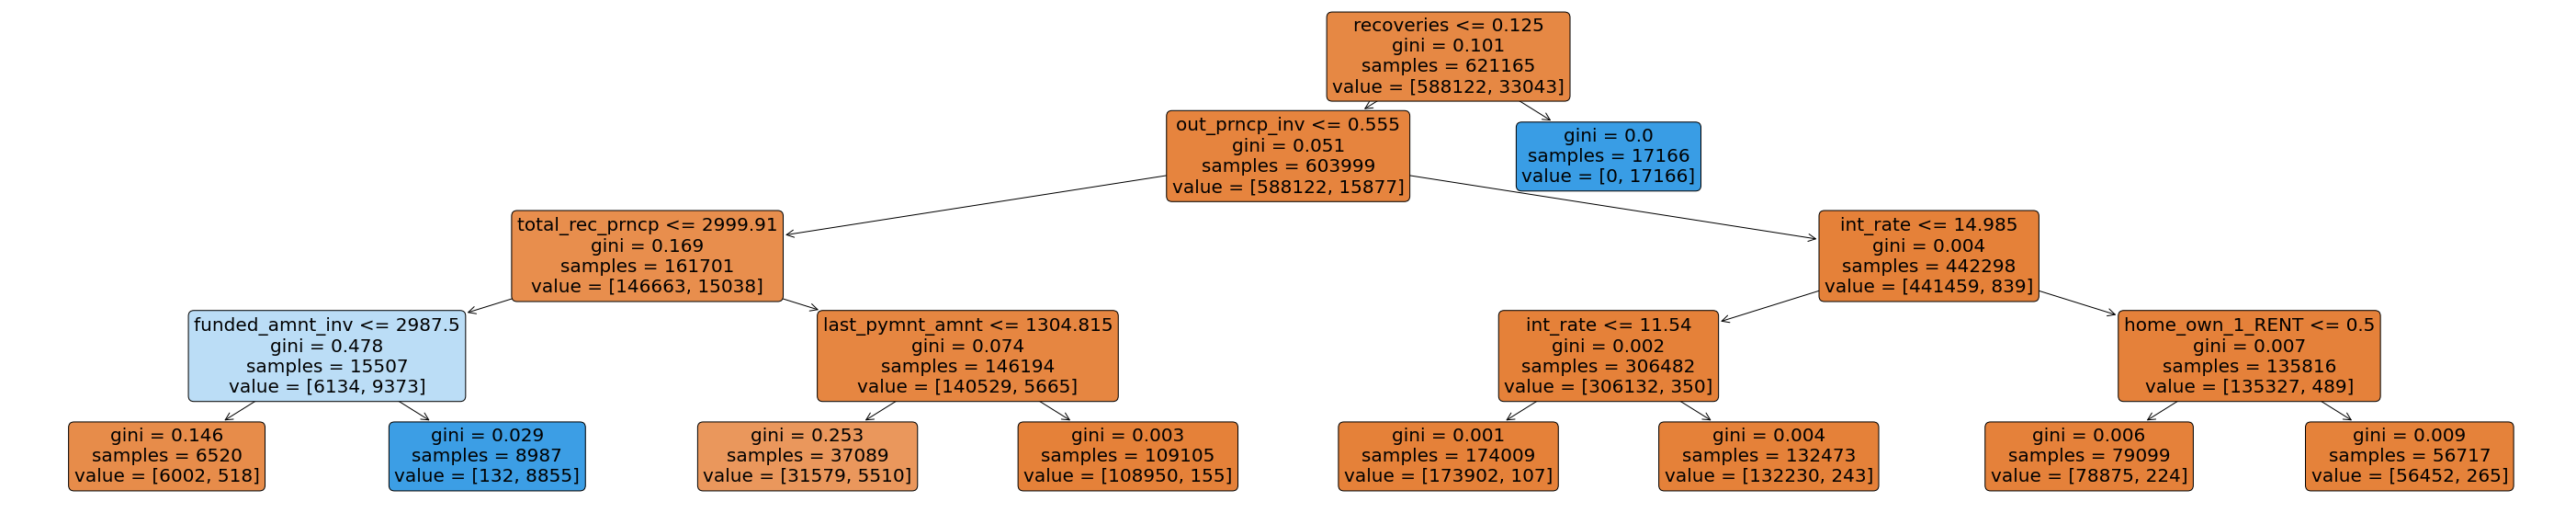

In [96]:
# Plotting the tree is a time consuming step due to huge data volume
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=20,rounded=True,feature_names=X_all.columns)
plt.show()

In [73]:
# Building a Random Forest Model to show feature importance
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [74]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,          # applying feature_importances_ function on rf object, gives importances in an array format. This is converted to a data-frame.
                                 index=X_train.columns,          
                                 columns=['importance']).sort_values('importance',ascending=False) # most important features come over the top
feature_importances

,importance
recoveries,2.407136e-01
collection_recovery_fee,1.461739e-01
total_rec_prncp,9.814089e-02
funded_amnt_inv,8.950180e-02
out_prncp_inv,8.215354e-02
out_prncp,8.074012e-02
last_pymnt_amnt,7.306237e-02
total_pymnt_inv,4.481085e-02
total_pymnt,4.412551e-02
total_rec_int,3.563622e-02


- feature_importances should be checked through the permutation of features. This would be a better way of finding feature_importances.

In [79]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(random_state=0)
clf.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

import pandas as pd
feature_importances=pd.DataFrame(clf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

In [76]:
X_train.columns

Index(['purpose_1_house', 'purpose_1_moving', 'purpose_1_others',
       'purpose_1_renewable_energy', 'purpose_1_small_business',
       'purpose_1_wedding', 'verified_1_Verified', 'home_own_1_OWN',
       'home_own_1_RENT', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'emp_length_1 year', 'emp_length_10+ years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_length_7 years', 'emp_length_8 years',
       'emp_length_less than 1 year', 'pymnt_plan_y', 'application_type_JOINT',
       'funded_amnt_inv', 'annual_inc', 'revol_bal', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'int_rate', 'inq_last_6mths'],
      dtype='object')

In [77]:
# Column name of X_train had to be modified to remove '<' in the column names of X_train
X_train=X_train.rename(columns={'emp_length_< 1 year':'emp_length_less than 1 year'}) 

- Column name of X_train had to be modified to remove '<' in the column names of X_train. This rectification was based on the XG Boost model error.

In [78]:
X_train.columns

Index(['purpose_1_house', 'purpose_1_moving', 'purpose_1_others',
       'purpose_1_renewable_energy', 'purpose_1_small_business',
       'purpose_1_wedding', 'verified_1_Verified', 'home_own_1_OWN',
       'home_own_1_RENT', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'emp_length_1 year', 'emp_length_10+ years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_length_7 years', 'emp_length_8 years',
       'emp_length_less than 1 year', 'pymnt_plan_y', 'application_type_JOINT',
       'funded_amnt_inv', 'annual_inc', 'revol_bal', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'int_rate', 'inq_last_6mths'],
      dtype='object')

In [65]:
# Building a XGBoost Model
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=0,max_depth = 4)
xgb.fit(X_train, y_train)

[08:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

- Running a simple XG Boost model, with no hyperparameter tuning & grid seach for XG Boost. Hyper-parameter tuning & Grid-Search CV were skipped, because of the longer code execution times for fitting 9 lacs rows of the data.

In [80]:
# Model Evaluation
y_pred=clf.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_xgb=xgb.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:  # Doing everything on test data
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [82]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [83]:
# GBM data metrics
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Accuracy: 0.9967432216186978
Precision 0.9966437947494033
Recall 0.9420514628128305
f1_score 0.9685789874243468


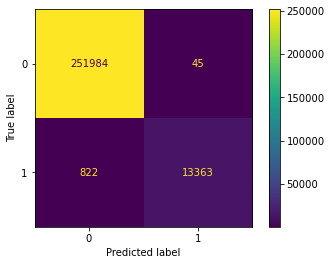

In [84]:
metrics.plot_confusion_matrix(clf,X_test, y_test)

- 822+13363=14185. These many people have gone bad on the loans. Out of these, only 822 has not been captured by GBM model.
- 822 events are not meeting the 50% threshold criteria. Their probabilities are less than 50%.
- The probabilities coming from the GBM model has a stronger discriminative power than Decision Tree probability.

In [85]:
print_score(clf, X_train, y_train, X_test, y_test, train=True) #printing the accuracy of the model over tain and test
print_score(clf, X_train, y_train, X_test, y_test, train=False) #building the model on test data, not on train data,so train=False here 

Train Result:
Accuracy Score: 99.67%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.996703      0.997434   0.99674       0.997069       0.996742
recall          0.999864      0.941137   0.99674       0.970501       0.996740
f1-score        0.998281      0.968468   0.99674       0.983375       0.996695
support    588122.000000  33043.000000   0.99674  621165.000000  621165.000000
_______________________________________________
Confusion Matrix: 
 [[588042     80]
 [  1945  31098]]

Test Result:
Accuracy Score: 99.67%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.996748      0.996644  0.996743       0.996696       0.996743
recall          0.999821      0.942051  0.996743       0.970936       0.996743
f1-score        0.998283      0.968579  0.996743 

In [86]:
# Decision tree test data metrics
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.9885543209598293
Precision 0.9939684229199929
Recall 0.7899894254494184
f1_score 0.8803173730311482


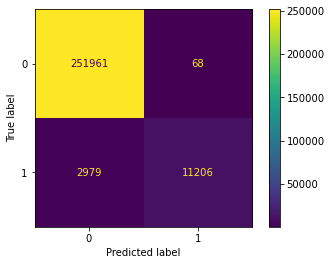

In [87]:
# Confusion matrix for Decision Tree
metrics.plot_confusion_matrix(dtree, X_test, y_test)

In [88]:
print_score(dtree, X_train, y_train, X_test, y_test, train=True) #printing the accuracy of the model over tain and test
print_score(dtree, X_train, y_train, X_test, y_test, train=False) #building the model on test data, not on train data,so train=False here 

Train Result:
Accuracy Score: 98.85%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.988199      0.994953  0.988483       0.991576       0.988558
recall          0.999776      0.787489  0.988483       0.893632       0.988483
f1-score        0.993953      0.879147  0.988483       0.936550       0.987846
support    588122.000000  33043.000000  0.988483  621165.000000  621165.000000
_______________________________________________
Confusion Matrix: 
 [[587990    132]
 [  7022  26021]]

Test Result:
Accuracy Score: 98.86%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.988315      0.993968  0.988554       0.991142       0.988616
recall          0.999730      0.789989  0.988554       0.894860       0.988554
f1-score        0.993990      0.880317  0.988554 

In [89]:
# Random Forest test data metrics
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.9976635338487082
Precision 0.9997789078045545
Recall 0.9563623545999295
f1_score 0.9775888160265186


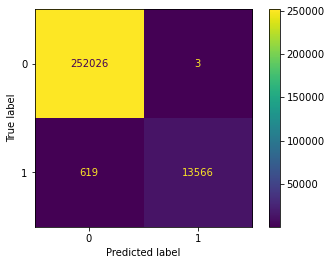

In [90]:
# Confusion Matrix of Random Forests
metrics.plot_confusion_matrix(rf,X_test, y_test)

- Out of all the events that the model is trying to predict, only 3 have True label 0. So, almost all the events the model predicted has happened. Thatswhy Precision is 99.98%.
- But in reality, around 95.6% of the total number of actual events corresponding to 1, have been predicted by the model.
Precision can be good, but there are a lot of events(Risky customers) on the table that you cannot predict because of 50% cutoff. There could be a lot of risky customers (619 here) that are being missed, as these did not meet the 50% criteria. It could be that many of these had 30% probability. This is the reason dot predict can lead to confusion in many real life situations. It can lead to a lot of losses for the banks.


In [91]:
print_score(rf, X_train, y_train, X_test, y_test, train=True) #printing the accuracy of the model over tain and test
print_score(rf, X_train, y_train, X_test, y_test, train=False) #building the model on test data, not on train data,so train=False here 

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.999988      1.000000  0.999989       0.999994       0.999989
recall          1.000000      0.999788  0.999989       0.999894       0.999989
f1-score        0.999994      0.999894  0.999989       0.999944       0.999989
support    588122.000000  33043.000000  0.999989  621165.000000  621165.000000
_______________________________________________
Confusion Matrix: 
 [[588122      0]
 [     7  33036]]

Test Result:
Accuracy Score: 99.77%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.997550      0.999779  0.997664       0.998664       0.997669
recall          0.999988      0.956362  0.997664       0.978175       0.997664
f1-score        0.998768      0.977589  0.997664

In [92]:
# XGB metrics
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision",metrics.precision_score(y_test,y_pred_xgb))
print("Recall",metrics.recall_score(y_test,y_pred_xgb))
print("f1_score",metrics.f1_score(y_test,y_pred_xgb))

Accuracy: 0.998144350034183
Precision 0.9989795174575407
Recall 0.9661614381388791
f1_score 0.9822964449541286


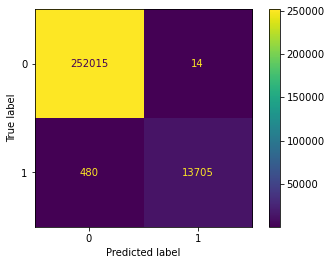

In [93]:
metrics.plot_confusion_matrix(xgb,X_test, y_test)

In [94]:
print_score(xgb, X_train, y_train, X_test, y_test, train=True) #printing the accuracy of the model over tain and test
print_score(xgb, X_train, y_train, X_test, y_test, train=False) #building the model on test data, not on train data,so train=False here 

Train Result:
Accuracy Score: 99.83%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.998196      0.999687  0.998273       0.998942       0.998275
recall          0.999983      0.967830  0.998273       0.983906       0.998273
f1-score        0.999089      0.983501  0.998273       0.991295       0.998259
support    588122.000000  33043.000000  0.998273  621165.000000  621165.000000
_______________________________________________
Confusion Matrix: 
 [[588112     10]
 [  1063  31980]]

Test Result:
Accuracy Score: 99.81%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.998099      0.998980  0.998144       0.998539       0.998146
recall          0.999944      0.966161  0.998144       0.983053       0.998144
f1-score        0.999021      0.982296  0.998144 

In [95]:
df_loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'desc', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_

In [97]:
df_loan=df_loan.drop(['pred_prob_dtree', 'P_Rank_tree', 'y_pred_P', 'P_Rank_RF'],axis=1)

In [98]:
# Decsion Tree Lorenz Curve formation divided into various snippets
# Lorenz Curve Analysis tells us how strong & good are the probabilities(Rank-ordered) in actually capturing the risky customers.
df_loan.head(35)
df=df_loan

In [99]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]  # gives 2 columns: Prob. of not risky(0) & Risky(1)
df['pred_prob_dtree']=pd.DataFrame(y_pred_prob) # array of predicted probabilites->converted into a data-frame->column created in original df
df['P_Rank_tree']=pd.qcut(df['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1 # Quartile cut is another way of creating deciles, on one column
# divides the column(containing ascending order of values) into 10 deciles/groups each containing 10% observations, and ranks these deciles uniquely
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,target,pred_prob_dtree,P_Rank_tree
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.148562,9
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.000000,10
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.079448,9
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.148562,9
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.001834,5


- Grouping has been done on the basis of the probabilities estimated by the Decision Tree model.

In [100]:
rank_df_actuals=df.groupby('P_Rank_tree')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)
rank_df_actuals

,count,mean
P_Rank_tree,,
1,88738,0.000992
2,88738,0.000124
3,88738,0.000868
4,88738,0.001386
5,88738,0.001792
6,88737,0.001657
7,88738,0.002558
8,88738,0.002738
9,88738,0.013106


In [101]:
rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True) # Renaming columns of rank_df_actuals dataframe to get specific names
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")
rank_df

,count,Actual_event_rate,Predicted_event_rate
P_Rank_tree,,,
1,88738,0.000992,0.000615
2,88738,0.000124,0.000615
3,88738,0.000868,0.000774
4,88738,0.001386,0.001421
5,88738,0.001792,0.001601
6,88737,0.001657,0.001834
7,88738,0.002558,0.002145
8,88738,0.002738,0.002900
9,88738,0.013106,0.014868


In [102]:
# sorts the data in descending order of probabilities
sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate'] # Actual number of events=count*mean
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum() # Applying cum_sum on N_events to get the cumulative events
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum() # cumulative of event_cap
sorted_rank_df

,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap
P_Rank_tree,,,,,,,
10,88738,0.506998,0.505562,44990.0,44990.0,0.952613,0.952613
9,88738,0.013106,0.014868,1163.0,46153.0,0.024625,0.977238
8,88738,0.002738,0.002900,243.0,46396.0,0.005145,0.982383
7,88738,0.002558,0.002145,227.0,46623.0,0.004806,0.987190
6,88737,0.001657,0.001834,147.0,46770.0,0.003113,0.990302
5,88738,0.001792,0.001601,159.0,46929.0,0.003367,0.993669
4,88738,0.001386,0.001421,123.0,47052.0,0.002604,0.996273
3,88738,0.000868,0.000774,77.0,47129.0,0.001630,0.997904
2,88738,0.000124,0.000615,11.0,47140.0,0.000233,0.998137


- 47228 is the total number of risky cases/customers present. 44990 is the total number of risky cases present in the first decile.
- 0.952613(Event cap) = 44990/47228 for the first row. 
- cum_event_cap says that if we only restrict to the first decile, then it will account for 95% of all defaulters/bad customers.
- The third decile capture in 'cum_event_cap' will be run for all the models. This particular quantity (0.982383 for Decision tree) will be compared for all the models.

In [103]:
# talks about the non-events, or the non-churners
sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()
sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)
sorted_rank_df
# snippet ran to capture the behavior of the non-churners

,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS
P_Rank_tree,,,,,,,,,,,,
10,88738,0.506998,0.505562,44990.0,44990.0,0.952613,0.952613,43748.0,43748.0,0.052072,0.052072,0.9005
9,88738,0.013106,0.014868,1163.0,46153.0,0.024625,0.977238,87575.0,131323.0,0.104237,0.156309,0.8209
8,88738,0.002738,0.002900,243.0,46396.0,0.005145,0.982383,88495.0,219818.0,0.105332,0.261641,0.7207
7,88738,0.002558,0.002145,227.0,46623.0,0.004806,0.987190,88511.0,308329.0,0.105351,0.366992,0.6202
6,88737,0.001657,0.001834,147.0,46770.0,0.003113,0.990302,88590.0,396919.0,0.105445,0.472438,0.5179
5,88738,0.001792,0.001601,159.0,46929.0,0.003367,0.993669,88579.0,485498.0,0.105432,0.577870,0.4158
4,88738,0.001386,0.001421,123.0,47052.0,0.002604,0.996273,88615.0,574113.0,0.105475,0.683345,0.3129
3,88738,0.000868,0.000774,77.0,47129.0,0.001630,0.997904,88661.0,662774.0,0.105530,0.788875,0.2090
2,88738,0.000124,0.000615,11.0,47140.0,0.000233,0.998137,88727.0,751501.0,0.105608,0.894483,0.1037


In [104]:
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_tree,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile,lift_over_random
0,10,88738,0.506998,0.505562,44990.0,44990.0,0.952613,0.952613,43748.0,43748.0,0.052072,0.052072,0.9005,0.100000,0.100000,1,9.526118
1,9,88738,0.013106,0.014868,1163.0,46153.0,0.024625,0.977238,87575.0,131323.0,0.104237,0.156309,0.8209,0.100000,0.200000,2,4.886185
2,8,88738,0.002738,0.002900,243.0,46396.0,0.005145,0.982383,88495.0,219818.0,0.105332,0.261641,0.7207,0.100000,0.300000,3,3.274607
3,7,88738,0.002558,0.002145,227.0,46623.0,0.004806,0.987190,88511.0,308329.0,0.105351,0.366992,0.6202,0.100000,0.400000,4,2.467972
4,6,88737,0.001657,0.001834,147.0,46770.0,0.003113,0.990302,88590.0,396919.0,0.105445,0.472438,0.5179,0.099999,0.499999,5,1.980607
5,5,88738,0.001792,0.001601,159.0,46929.0,0.003367,0.993669,88579.0,485498.0,0.105432,0.577870,0.4158,0.100000,0.600000,6,1.656116
6,4,88738,0.001386,0.001421,123.0,47052.0,0.002604,0.996273,88615.0,574113.0,0.105475,0.683345,0.3129,0.100000,0.700000,7,1.423248
7,3,88738,0.000868,0.000774,77.0,47129.0,0.001630,0.997904,88661.0,662774.0,0.105530,0.788875,0.2090,0.100000,0.800000,8,1.247380
8,2,88738,0.000124,0.000615,11.0,47140.0,0.000233,0.998137,88727.0,751501.0,0.105608,0.894483,0.1037,0.100000,0.900000,9,1.109041
9,1,88738,0.000992,0.000615,88.0,47228.0,0.001863,1.000000,88650.0,840151.0,0.105517,1.000000,0.0000,0.100000,1.000000,10,1.000000


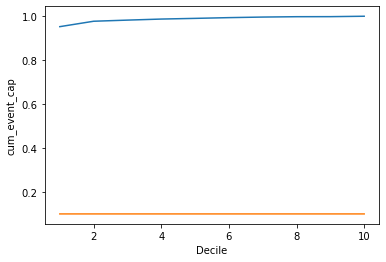

In [105]:
# Lorenz curve for Decision Tree
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="Decile", y="random_cap", data=sorted_reindexed)

In [106]:
df.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['min','max'])

,min,max
P_Rank_tree,,
1,0.000615,0.000615
2,0.000615,0.000615
3,0.000615,0.001421
4,0.001421,0.001421
5,0.001421,0.001834
6,0.001834,0.001834
7,0.001834,0.002832
8,0.002832,0.004672
9,0.004672,0.148562


In [107]:
# Snippet for Lorenz curve of Random Forests
df=df_loan
y_pred_prob = rf.predict_proba(X_all)[:, 1]    # Event probabilities are always found in the second column
df['pred_prob_rf']=pd.DataFrame(y_pred_prob)
df['P_Rank_RF']=pd.qcut(df['pred_prob_rf'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df_loan.groupby('P_Rank_RF')['target'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,88738,0.528736,46919.0,46919.0,0.993457,0.993457,0.100000,0.100000,1,9.934562
1,9,88738,0.000935,83.0,47002.0,0.001757,0.995215,0.100000,0.200000,2,4.976068
2,8,88738,0.000462,41.0,47043.0,0.000868,0.996083,0.100000,0.300000,3,3.320272
3,7,88738,0.000158,14.0,47057.0,0.000296,0.996379,0.100000,0.400000,4,2.490945
4,6,88737,0.000034,3.0,47060.0,0.000064,0.996443,0.099999,0.499999,5,1.992888
5,5,88738,0.000023,2.0,47062.0,0.000042,0.996485,0.100000,0.600000,6,1.660810
6,4,88738,0.000620,55.0,47117.0,0.001165,0.997650,0.100000,0.700000,7,1.425215
7,3,88738,0.000665,59.0,47176.0,0.001249,0.998899,0.100000,0.800000,8,1.248624
8,2,88738,0.000237,21.0,47197.0,0.000445,0.999344,0.100000,0.900000,9,1.110382
9,1,88738,0.000349,31.0,47228.0,0.000656,1.000000,0.100000,1.000000,10,1.000000


- Grouping has been done on the basis of prob values coming from the RF model.
- cum_event_cap till the 3rd decile is 99.6%, highest across all the models so far. Therefore, RF(Random Forest) is clearly a winner here.
- Looking at the mean(Average Actual value) of the first decile is 52.8%, and 50% is the cutoff of CM(Confusion Matrix). This is the reason why the CM was so successful. Thatswhy, a highly predictive outcome is obtained.
- The value of random_cap is going to be same because of the assumption of randomness in case there is no model.
- random_cap is synonymous with no-model scenario. In this scenario, every decile gets only 10% event rate. The success is proportional to the risk taken.
- The Bank is going to be helped by this model, because it will reduce the risk on 90% of the data, and the majority events are concentrated in the first few deciles. This output is heavily lopsided towards the first decile.
- The probabilities that have been used to create these deciles are very sharp in this output.
- Since the risk is higher for the first decile. If the risk is high, then higher interest rates should be charged for the first few deciles. So, the customers falling in the first decile should be given high interest rates.

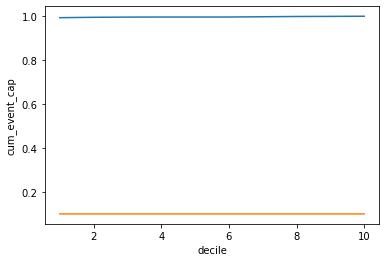

In [108]:
# Lorenz Curve for RF model
ax = sns.lineplot( x="decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)

- This is much stronger than a typical Lorenz curve. In this case, the first decile in itself is so successful that is able to capture almost everybody who was a risky customer, i.e. 99% capture.

In [109]:
df.groupby('P_Rank_RF')['pred_prob_rf'].agg(['min','max'])

,min,max
P_Rank_RF,,
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,0.00,0.00
6,0.00,0.00
7,0.00,0.00
8,0.00,0.00
9,0.00,0.01


In [110]:
# Snippet for Lorenz curve of XGB model
df=df_loan
y_pred_prob = xgb.predict_proba(X_all)[:, 1]
df['pred_prob_xgb']=pd.DataFrame(y_pred_prob)
df['P_Rank_XGB']=pd.qcut(df['pred_prob_xgb'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df_loan.groupby('P_Rank_XGB')['target'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_XGB',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_XGB,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,88738,0.522144,46334.0,46334.0,0.981071,0.981071,0.100000,0.100000,1,9.810694
1,9,88738,0.004395,390.0,46724.0,0.008258,0.989328,0.100000,0.200000,2,4.946636
2,8,88738,0.002333,207.0,46931.0,0.004383,0.993711,0.100000,0.300000,3,3.312367
3,7,88738,0.001330,118.0,47049.0,0.002499,0.996210,0.100000,0.400000,4,2.490522
4,6,88737,0.000834,74.0,47123.0,0.001567,0.997777,0.099999,0.499999,5,1.995556
5,5,88738,0.000676,60.0,47183.0,0.001270,0.999047,0.100000,0.600000,6,1.665080
6,4,88738,0.000259,23.0,47206.0,0.000487,0.999534,0.100000,0.700000,7,1.427907
7,3,88738,0.000135,12.0,47218.0,0.000254,0.999788,0.100000,0.800000,8,1.249736
8,2,88738,0.000090,8.0,47226.0,0.000169,0.999958,0.100000,0.900000,9,1.111064
9,1,88738,0.000023,2.0,47228.0,0.000042,1.000000,0.100000,1.000000,10,1.000000


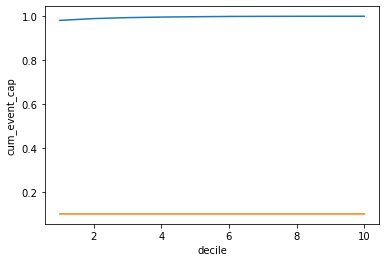

In [111]:
ax = sns.lineplot( x="decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)

In [112]:
df.groupby('P_Rank_XGB')['pred_prob_xgb'].agg(['min','max'])

,min,max
P_Rank_XGB,,
1,8.495621e-08,0.000083
2,8.265221e-05,0.000212
3,2.124889e-04,0.000423
4,4.229616e-04,0.000710
5,7.103897e-04,0.001118
6,1.117777e-03,0.001674
7,1.673999e-03,0.002397
8,2.397367e-03,0.003414
9,3.414086e-03,0.005833


In [113]:
# Snippet for Lorenz curve of GBM model
df=df_loan
y_pred_prob = clf.predict_proba(X_all)[:, 1]   # Since 2nd column i.e. prob of event or a person being Risky is of interest 
df['y_pred']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['y_pred'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df_loan.groupby('P_Rank_GBM')['target'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_GBM,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,88738,0.517726,45942.0,45942.0,0.972770,0.972770,0.100000,0.100000,1,9.727693
1,9,88738,0.004305,382.0,46324.0,0.008088,0.980859,0.100000,0.200000,2,4.904289
2,8,88738,0.002783,247.0,46571.0,0.005230,0.986089,0.100000,0.300000,3,3.286959
3,7,88738,0.002310,205.0,46776.0,0.004341,0.990429,0.100000,0.400000,4,2.476071
4,6,88737,0.001555,138.0,46914.0,0.002922,0.993351,0.099999,0.499999,5,1.986705
5,5,88738,0.001104,98.0,47012.0,0.002075,0.995426,0.100000,0.600000,6,1.659045
6,4,88738,0.000969,86.0,47098.0,0.001821,0.997247,0.100000,0.700000,7,1.424640
7,3,88738,0.000631,56.0,47154.0,0.001186,0.998433,0.100000,0.800000,8,1.248042
8,2,88738,0.000428,38.0,47192.0,0.000805,0.999238,0.100000,0.900000,9,1.110264
9,1,88738,0.000406,36.0,47228.0,0.000762,1.000000,0.100000,1.000000,10,1.000000


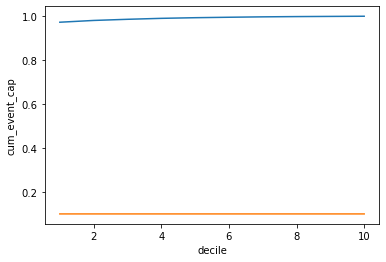

In [114]:
ax = sns.lineplot( x="decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)

In [115]:
df.groupby('P_Rank_GBM')['y_pred'].agg(['min','max'])

,min,max
P_Rank_GBM,,
1,0.000028,0.000946
2,0.000946,0.001179
3,0.001179,0.001349
4,0.001349,0.001667
5,0.001667,0.002034
6,0.002034,0.002459
7,0.002459,0.003086
8,0.003086,0.003712
9,0.003712,0.016878


- Depending upon the percentage of the actual customers captured, best performing algorithm can be decided.
- This best performing algorithm can be used to form future strategies while deploying the model.

In [ ]:
x=[15, 18, 21, 22, 26, 28, 28]
df=pd.DataFrame(x)
df.quantile(0.5)
df.var()t

In [ ]:
# Project Conclusion :- 
# Create a decision tree and show it to stakeholders. This will create awareness about the kind of rules that a Tree might 
# come up with
# Now speak about the benefit of ensembles and how they achieve a higher degress of robustness than a single tree
# Now is the time to show that the ensemble is as good if not better than the decison tree
# This way you can first sell the idea of a tree based solution and then sell the final product which is an ensemble of the
# idea you have already sold(decision tree)